# To Do:
1. Check relationship between self-consistency and consistency w/ other subjects
2. relation between modified faces and the images original rating

In [1]:
import pandas as pd
from correlationMethods import *
import matplotlib.pyplot as plt
import numpy as np
import re
from scipy.stats import pearsonr as corr
from correlationMethods import *


#### consistency with others:
1. convert the dataframe to a suitable model
2. Feed dataframe to the correct ICC

#### Steps to create dataframe with the index-subjectId, column headers-imgName, and rating as the inner values:
1. Find all the unique Id's
2. find all the values that are double rated - average the two
3. each subject should have ~80 scores
4. there are a bunch of imgNames, set them as the column headers
5. set the scores so that its missing values

#### Steps to calculate self consistancy:
1. find which faces were rated twice 
2. extract the score
3. pearson correlation

## Aggressive

Self-Consistency v. group-consistency

In [68]:
#pd.read_csv("../../../preparation_data/amt_gt_validation/aggressive_stim_lst.csv")
#pd.read_csv("../../../preparation_data/amt_modifae_new_single/aggressive_stim_lst.csv")
#pd.read_csv("../../../preparation_data/amt_modifAE_single_rating/aggressive_stim_lst.csv")

In [8]:
rawHumAgg = pd.read_csv("../aggressive/likert_data.csv")
modHumAgg = pd.read_csv("../modifae_aggressive/likert_data.csv")

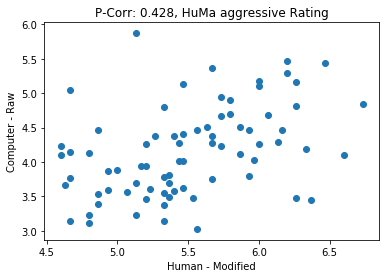

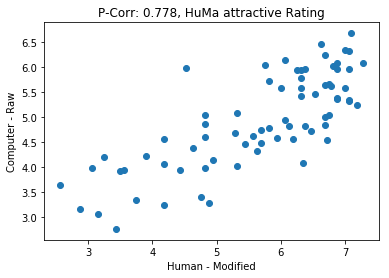

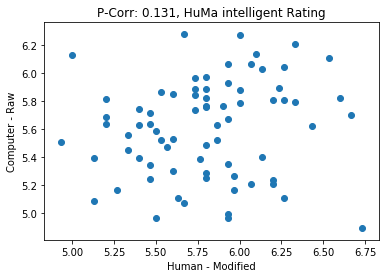

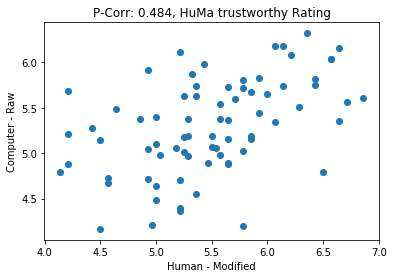

In [12]:
calcmHumrMac("aggressive")
calcmHumrMac("attractive")
calcmHumrMac("intelligent")
calcmHumrMac("trustworthy")

Consistency with self
SubId: A1089SKYYGN46O:3TOK3KHVJVP31NP8BZYV2CXAN2FO75
	 Pearson Cor:  0.07813453848974922
	 p-val:  0.7433428191309754
SubId: A1X84T4EFW04GZ:3QY5DC2MXTRBTLOBP48GPA2G3CKFUB
	 Pearson Cor:  0.30232031158068623
	 p-val:  0.19513727332065955
SubId: A1ZOLH6MN0ZH9R:3MYYFCXHJ5EIQNQRLINGUR4Y5E3G4V
	 Pearson Cor:  0.5432283766148854
	 p-val:  0.013311483185720537
SubId: A25H8NTVN9PI9B:3M0NZ3JDP350DNPWPFUFKQQIG0R5ZD
	 Pearson Cor:  0.004143674076851511
	 p-val:  0.9861670998726237
SubId: A2C7TMRC2QHTIW:3X87C8JFV8IS5XMGEFOAM8O6PHZSQT
	 Pearson Cor:  0.9358002088719861
	 p-val:  1.3918900885655826e-09
SubId: A2H6K1XIK4LY7O:3RXCAC0YITWJ9ODTXLDTB3K370P8GK
	 Pearson Cor:  0.14686035600580397
	 p-val:  0.5366711391195829
SubId: A2OD1KB2YCZ2SE:3YDTZAI2WZNLM80O3Z2DN40S3PI14E
	 Pearson Cor:  -0.47075654176200415
	 p-val:  0.03617861310248387
SubId: A3F51C49T9A34D:31T4R4OBOUN2SYS5LUP47C3TYOPC7P
	 Pearson Cor:  0.9538574722563834
	 p-val:  7.613975739090186e-11
SubId: A3JLE2LJ5I17E2:3J

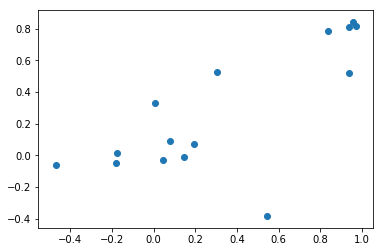

In [11]:
plt.scatter(calcSelfConsistency(rawHumAgg), calcGroupConsistency(rawHumAgg))

In [15]:
#selfCorrAgg = calcSelfConsistency(rawHumAgg)
#groupCorrAgg = calcGroupConsistency(rawHumAgg)
#calcHumMacConsistency(rawHumAgg, "aggressive")

In [14]:
"""
fig, ax = plt.subplots()
plt.xlabel("self")
plt.ylabel("group")
plt.title("aggressive")
ax.scatter(selfCorrAgg, groupCorrAgg)
subjs = map(lambda x: x[:4], agg.subId.unique())
for i, txt in enumerate(sorted(subjs)):
    ax.annotate(txt, (selfCorrAgg[i], groupCorrAgg[i]))
"""

'\nfig, ax = plt.subplots()\nplt.xlabel("self")\nplt.ylabel("group")\nplt.title("aggressive")\nax.scatter(selfCorrAgg, groupCorrAgg)\nsubjs = map(lambda x: x[:4], agg.subId.unique())\nfor i, txt in enumerate(sorted(subjs)):\n    ax.annotate(txt, (selfCorrAgg[i], groupCorrAgg[i]))\n'

### ICC
<img src="imgs/agg.png">

In [ ]:
#pd.pivot_table(agg, index="subId", columns="imgName", values="rating").to_csv("aggPiv.csv")
pd.pivot_table(aggMod, index="subId", columns="imgName", values="rating").to_csv("aggModPiv.csv")

## Attractive

In [43]:
att = pd.read_csv("../attractive/likert_data.csv")
attMod = pd.read_csv("../modifae_attractive/likert_data.csv")

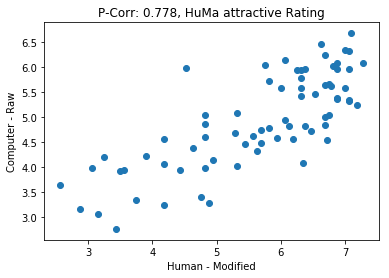

In [4]:
calcmHumrMac("attractive")

In [ ]:
#selfCorrAtt = calcSelfConsistency(att)
#groupCorrAtt = calcGroupConsistency(att)
#calcHumMacConsistency(att, "attractive")

In [ ]:
"""
fig, ax = plt.subplots()
plt.xlabel("self")
plt.ylabel("group")
plt.title("attractive")
ax.scatter(selfCorrAtt, groupCorrAtt)
subjs = map(lambda x: x[:4], att.subId.unique())
for i, txt in enumerate(sorted(subjs)):
    ax.annotate(txt, (selfCorrAtt[i], groupCorrAtt[i]))
"""

### ICC
<img src="imgs/att.png">

In [ ]:
#pd.pivot_table(att, index="subId", columns="imgName", values="rating").to_csv("attPiv.csv")

## Intelligent

In [47]:
inte = pd.read_csv("../intelligent/likert_data.csv")
inteMod = pd.read_csv("../modifae_intelligent/likert_data.csv")

In [30]:
modIndex = pd.pivot_table(inteMod, index="subId", columns="imgName", values="rating").mean(axis=0).index
indexNames = []
for i in modIndex:
    indexNames.append(i.split("_")[0] + ".jpg")
    
rawComp = celeb[["Filename", "intelligent"]]
rawComp = rawComp.loc[rawComp['Filename'].isin(indexNames)].sort_values("Filename")
rawComp.index = rawComp.Filename
rawComp = rawComp.drop("Filename", axis=1)

modHumData = pd.pivot_table(inteMod, index="subId", columns="imgName", values="rating").mean()
modHumData.index = indexNames

x = pd.concat([rawComp, modHumData], axis=1, join_axes=[rawComp.index])

In [31]:
corr(x[0], x.intelligent)

(0.13118285342786817, 0.26524135102315227)

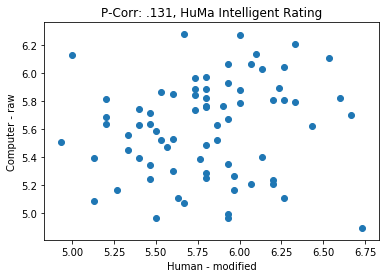

In [34]:
plt.scatter(x[0], x.intelligent)
plt.ylabel("Computer - raw")
plt.xlabel("Human - modified")
plt.title("P-Corr: .131, HuMa Intelligent Rating")
plt.show()

In [ ]:
#selfCorrInte = calcSelfConsistency(inte)
#groupCorrInte = calcGroupConsistency(inte)
#calcHumMacConsistency(inte, "intelligent")

In [ ]:
"""
fig, ax = plt.subplots()
plt.xlabel("self")
plt.ylabel("group")
plt.title("intelligent")
ax.scatter(selfCorrInte, groupCorrInte)
subjs = map(lambda x: x[:4], inte.subId.unique())
for i, txt in enumerate(sorted(subjs)):
    ax.annotate(txt, (selfCorrInte[i], groupCorrInte[i]))
"""

### ICC
<img src="imgs/inte.png">

In [ ]:
#pd.pivot_table(inte, index="subId", columns="imgName", values="rating").to_csv("intePiv.csv")

## Trustworthy

In [36]:
tru = pd.read_csv("../trustworthy/likert_data.csv")
truMod = pd.read_csv("../modifae_trustworthy/likert_data.csv")

In [37]:
modIndex = pd.pivot_table(truMod, index="subId", columns="imgName", values="rating").mean(axis=0).index
indexNames = []
for i in modIndex:
    indexNames.append(i.split("_")[0] + ".jpg")
    
rawComp = celeb[["Filename", "trustworthy"]]
rawComp = rawComp.loc[rawComp['Filename'].isin(indexNames)].sort_values("Filename")
rawComp.index = rawComp.Filename
rawComp = rawComp.drop("Filename", axis=1)

modHumData = pd.pivot_table(truMod, index="subId", columns="imgName", values="rating").mean()
modHumData.index = indexNames

x = pd.concat([rawComp, modHumData], axis=1, join_axes=[rawComp.index])

In [39]:
corr(x[0], x.trustworthy)

(0.48373134166693277, 1.099885679684411e-05)

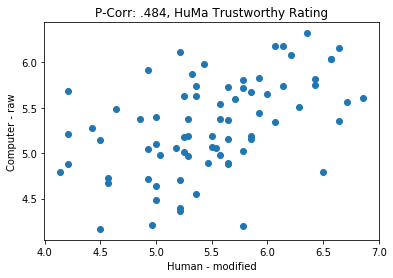

In [41]:
plt.scatter(x[0], x.trustworthy)
plt.ylabel("Computer - raw")
plt.xlabel("Human - modified")
plt.title("P-Corr: .484, HuMa Trustworthy Rating")
plt.show()

In [ ]:
#selfCorrTru = calcSelfConsistency(tru)
#groupCorrTru = calcGroupConsistency(tru)
#calcHumMacConsistency(tru, "trustworthy")

In [ ]:
"""
fig, ax = plt.subplots()
plt.xlabel("self")
plt.ylabel("group")
plt.title("trustworthy")
ax.scatter(selfCorrTru, groupCorrTru)
subjs = map(lambda x: x[:4], tru.subId.unique())
for i, txt in enumerate(sorted(subjs)):
    ax.annotate(txt, (selfCorrTru[i], groupCorrTru))
"""

### ICC
<img src="imgs/tru.png">

In [ ]:
#pd.pivot_table(tru, index="subId", columns="imgName", values="rating").to_csv("truPiv.csv")